# ◆ [Pace] 1. Plan Stage
・Understand the data in the problem context.

1.1. Import packages

1.2. Load dataset and do head()



In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
%cd /content/drive/My Drive/10_development/machine_learning/house-prices-advanced-regression-techniques

/content/drive/My Drive/10_development/machine_learning/house-prices-advanced-regression-techniques


In [52]:
import numpy as np
import pandas as pd

In [53]:
import seaborn as sns
sns.set()

In [54]:
df_train = pd.read_csv('data/train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
print(df_train.shape)

(1460, 81)


In [56]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

|#|Column|column_JP|Dtype|
|------|--------------|--------------||
|0|Id|ID|int64|
|1|MSSubClass|建物クラス|int64|
|2|MSZoning|ゾーニング|object|
|3|LotFrontage|敷地面積|float64|
|4|LotArea|敷地面積|int64|
|5|Street|通り|object|
|6|Alley|路地|object|
|7|LotShape|土地形状|object|
|8|LandContour|地形|object|
|9|Utilities|ユーティリティ|object|
|10|LotConfig|ロット構成|object|
|11|LandSlope|土地傾斜|object|
|12|Neighborhood|近隣|object|
|13|Condition1|条件1|object|
|14|Condition2|条件2|object|
|15|BldgType|建物タイプ|object|
|16|HouseStyle|ハウススタイル|object|
|17|OverallQual|総合評価|int64|
|18|OverallCond|総合条件|int64|
|19|YearBuilt|建築年|int64|
|20|YearRemodAdd|改築年|int64|
|21|RoofStyle|屋根のスタイル|object|
|22|RoofMatl|屋根マット|object|
|23|Exterior1st|外装1|object|
|24|Exterior2nd|外装2|object|
|25|MasVnrType|建物タイプ|object|
|26|MasVnrArea|面積|float64|
|27|ExterQual|外装品質|object|
|28|ExterCond|エクスターコンド|object|
|29|Foundation|基礎|object|
|30|BsmtQual|下地品質|object|
|31|BsmtCond|基礎|object|
|32|BsmtExposure|Bsmtエクスポージャ?|object|
|33|BsmtFinType1|BsmtFin?タイプ1|object|
|34|BsmtFinSF1|BsmtFinSF1?|int64|
|35|BsmtFinType2|BsmtFin?タイプ2|object|
|36|BsmtFinSF2|BsmtFinSF2?|int64|
|37|BsmtUnfSF|BsmtUnfSF?|int64|
|38|TotalBsmtSF|合計BsmtSF?|int64|
|39|Heating|暖房|object|
|40|HeatingQC|暖房QC|object|
|41|CentralAir|セントラルエアー|object|
|42|Electrical|電気|object|
|43|1stFlrSF|1階床|int64|
|44|2ndFlrSF|2階床|int64|
|45|LowQualFinSF|低品質SF|int64|
|46|GrLivArea|リビングエリア|int64|
|47|BsmtFullBath|Bsmtフルバス|int64|
|48|BsmtHalfBath|下半身浴|int64|
|49|FullBath|フルバス|int64|
|50|HalfBath|ハーフバス|int64|
|51|BedroomAbvGr|ベッドルーム|int64|
|52|KitchenAbvGr|キッチン|int64|
|53|KitchenQual|キッチンクオール|object|
|54|TotRmsAbvGrd|トットルーム|int64|
|55|Functional|機能的|object|
|56|Fireplaces|暖炉|int64|
|57|FireplaceQu|暖炉Qu|object|
|58|GarageType|ガレージタイプ|object|
|59|GarageYrBlt|ガレージYrBlt|float64|
|60|GarageFinish|ガレージ仕上げ|object|
|61|GarageCars|ガレージ車|int64|
|62|GarageArea|ガレージ面積|int64|
|63|GarageQual|ガレージ品質|object|
|64|GarageCond|車庫証明|object|
|65|PavedDrive|舗装ドライブ|object|
|66|WoodDeckSF|ウッドデッキSF|int64|
|67|OpenPorchSF|オープンポーチSF|int64|
|68|EnclosedPorch|クローズドポーチ|int64|
|69|3SsnPorch|3Snポーチ|int64|
|70|ScreenPorch|スクリーンポーチ|int64|
|71|PoolArea|プールエリア|int64|
|72|PoolQC|プールQC|object|
|73|Fence|フェンス|object|
|74|MiscFeature|その他の特徴|object|
|75|MiscVal|その他|int64|
|76|MoSold|売約済み|int64|
|77|YrSold|販売年|int64|
|78|SaleType|セールタイプ|object|
|79|SaleCondition|販売条件|object|
|80|SalePrice|販売価格|int64|

# ◆ [pAce] 2. Analyze Stage
・EDA(Explanatory Data Analysis: 探索的データ分析), check model assumptions and think about selecting model

First, try to touch the data, visualize the data, look for patterns in the data, and feel the relationships/correlations between features and targets.



1.3 Data Exploration (Initial EDA and data cleaning) info(), describe(), columns, isna().sum() and duplicated().sum()

1.4 Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

1.5 Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')

1.4 Check outliers
boxplot, 四分位範囲（IQR) = 第3四分位数（Q3) - 第1四分位数（Q1）





・2.1.Data Exploration (Continue EDA: analyze relationships between variables)

・2.2.Data visualizations

・2.3.Get insights


In [57]:
def print_df_info(df):
    for column in df.columns:
        unique_count = df[column].nunique()
        unique_values = df[column].unique()
        unique_values_str = str(unique_values)
        unique_values_str_limited = unique_values_str[:50]
        print(f"column_name: {column}, [{df[column].dtype}], unique_count: {unique_count}, part_of_unique_values{unique_values_str_limited}")
    return

print_df_info(df_train)

column_name: Id, [int64], unique_count: 1460, part_of_unique_values[   1    2    3 ... 1458 1459 1460]
column_name: MSSubClass, [int64], unique_count: 15, part_of_unique_values[ 60  20  70  50 190  45  90 120  30  85  80 160  
column_name: MSZoning, [object], unique_count: 5, part_of_unique_values['RL' 'RM' 'C (all)' 'FV' 'RH']
column_name: LotFrontage, [float64], unique_count: 110, part_of_unique_values[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.
column_name: LotArea, [int64], unique_count: 1073, part_of_unique_values[ 8450  9600 11250 ... 17217 13175  9717]
column_name: Street, [object], unique_count: 2, part_of_unique_values['Pave' 'Grvl']
column_name: Alley, [object], unique_count: 2, part_of_unique_values[nan 'Grvl' 'Pave']
column_name: LotShape, [object], unique_count: 4, part_of_unique_values['Reg' 'IR1' 'IR2' 'IR3']
column_name: LandContour, [object], unique_count: 4, part_of_unique_values['Lvl' 'Bnk' 'Low' 'HLS']
column_name: Utilities, [object], unique_count: 2, part_of

In [58]:
# 重複行の削除（これであってる？列ごとにみなくてよいのか？あってるか。列ごとに重複をみたら重複だらけになるね。）
print(df_train.duplicated().sum())

0


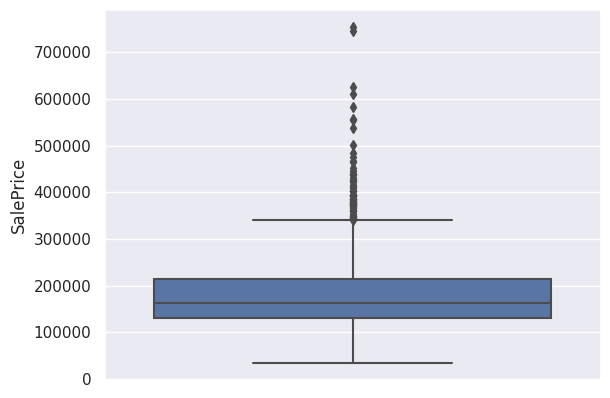

In [59]:
sns.boxplot(y = "SalePrice", data = df_train);

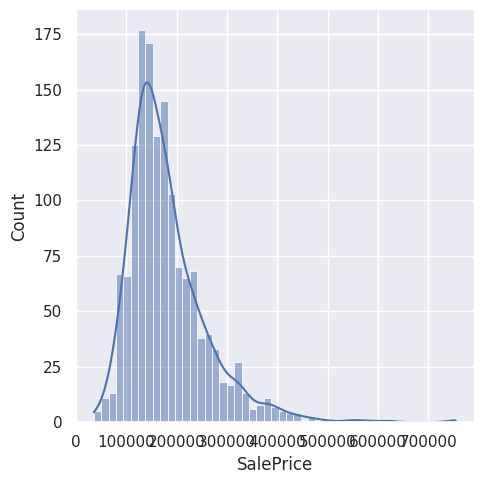

In [60]:
sns.displot(df_train['SalePrice'], kde=True)

In [61]:
# show the amount of each dtypes
print(df_train.dtypes.groupby(df_train.dtypes).size())

int64      35
float64     3
object     43
dtype: int64


<ipython-input-62-6fb9a50ef54e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cols = df_train.corr().nlargest(n, 'SalePrice')['SalePrice'].index


<Axes: >

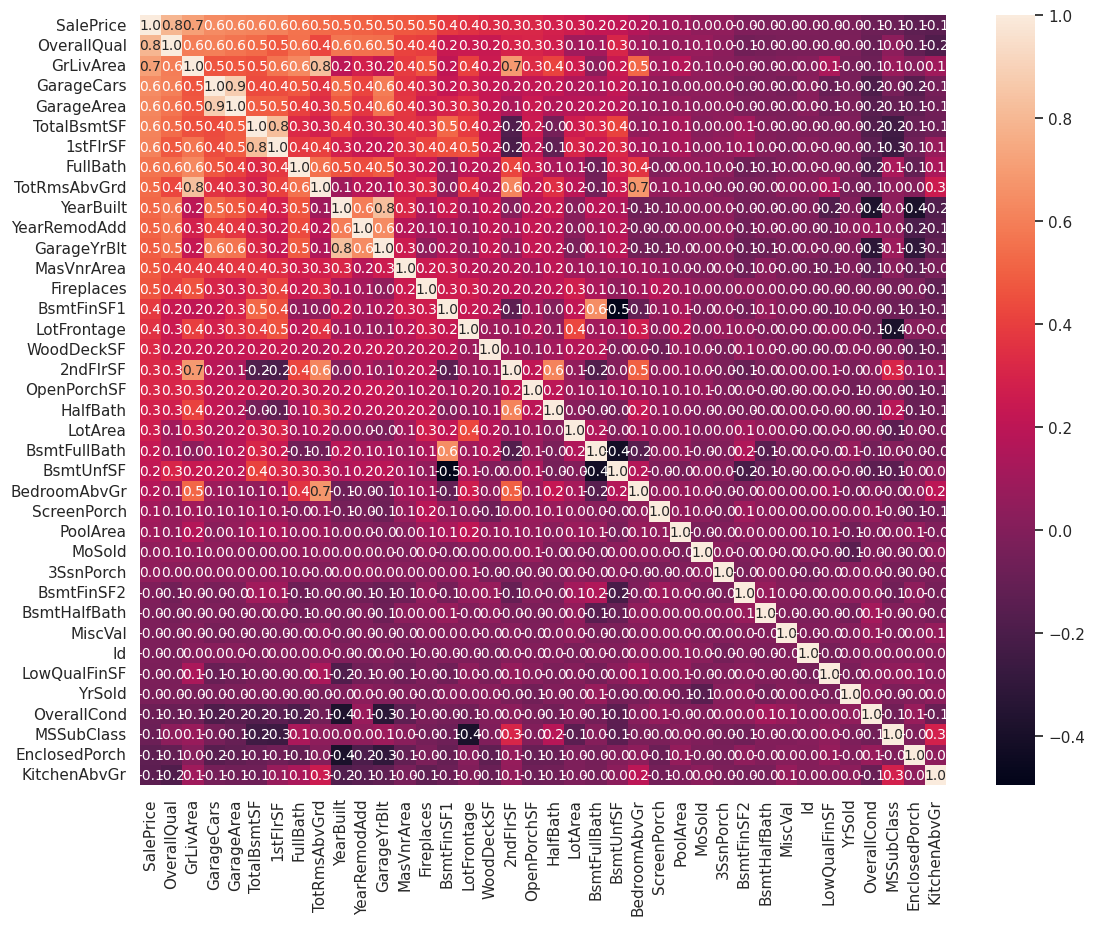

In [62]:
import matplotlib.pyplot as plt

n = 38 # 35+3
plt.figure(figsize=(13,10))
cols = df_train.corr().nlargest(n, 'SalePrice')['SalePrice'].index
sns.heatmap(df_train[cols].corr(), annot=True, fmt='.1f', annot_kws={'size':10})

###Data preprocessing
I would concat train and test datas, and preprocess them at the same time. However, I do not remove outliers here, as all rows of test data must remain. テストデータの行はすべて残さなければならない

In [63]:
df_test = pd.read_csv('data/test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [64]:
print(df_test.shape)

(1459, 80)


In [65]:
# concat
all_df = pd.concat([df_train.drop(columns='SalePrice'),df_test])

In [66]:
# check the amount of missing value
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(all_df.isna().sum()[all_df.isna().sum()>0])
    #print(all_df.isna().sum().sort_values(ascending=False))
    #print(all_df.isna().sum())

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


In [67]:
# I don't need id column テストデータのidも消してしまうところだった。
#all_df=all_df.drop(['Id'],axis=1)

In [71]:
"""
# YearBuiltでGarageYrBltを補完してよいか？これを確認するため関係を可視化する。
plt.plot(all_df.YearBuilt, all_df.GarageYrBlt,'.', alpha=0.5)

# →相関がみられる。補完する。
all_df['GarageYrBlt'].fillna(all_df.YearBuilt,inplace=True)
"""

"\n# YearBuiltでGarageYrBltを補完してよいか？これを確認するため関係を可視化する。\nplt.plot(all_df.YearBuilt, all_df.GarageYrBlt,'.', alpha=0.5)\n\n# →相関がみられる。補完する。\nall_df['GarageYrBlt'].fillna(all_df.YearBuilt,inplace=True)\n"

### check the explanation of isna().sum()>0

|column_name|explain|explain_JP|isna().sum()|type|unique_count|ex value|decision|my_comment|
|----|----|----|----|----|----|----|----|----|
|MSZoning|Identifies the general zoning classification of the sale.|売却の一般的なゾーニング区分を示す。|4|object|5|'RL' 'RM' 'C (all)' 'FV' 'RH'|mode()||
|LotFrontage|Linear feet of street connected to property|物件に接続している道路の直線距離|486|float|110| 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.|median()||
|Alley|Type of alley access to property|敷地への路地の種類|2721|object|2|nan 'Grvl' 'Pave'|None|Nan多すぎ。|
|Utilities|Type of utilities available|利用可能なユーティリティの種類|2|object|2|'AllPub' 'NoSeWa'|drop||
|Exterior1st|Exterior covering on house|家の外壁|1|object|15|'VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace'|mode()||
|Exterior2nd|Exterior covering on house (if more than one material)|家の外壁（複数の材質の場合）|1|object|16|'VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood'|mode()||
|MasVnrType|Masonry veneer type|石積みの種類|24|object|4|'BrkFace' 'None' 'Stone' 'BrkCmn' nan|None||
|MasVnrArea|Masonry veneer area in square feet|石造ベニヤの面積（平方フィート|23|object|327|.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02|0||
|BsmtQual|Evaluates the height of the basement|地下室の高さの評価|81|object|4|'Gd' 'TA' 'Ex' nan 'Fa'|None||
|BsmtCond|Evaluates the general condition of the basement|地下室の一般的な状態を評価する。|82|object|4|'TA' 'Gd' nan 'Fa' 'Po'|None||
|BsmtExposure|Refers to walkout or garden level walls|ウォークアウトまたはガーデンレベルの壁を指す|82|object|4|'No' 'Gd' 'Mn' 'Av' nan|None||
|BsmtFinType1|Rating of basement finished area|地下室の仕上げ面積の評価|79|object|6|'GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ'|None||
|BsmtFinSF1|Type 1 finished square feet|タイプ1の完成面積|1|object|637|706  978  486  216  655  732 1369  859    0  851|0||
|BsmtFinType2|Rating of basement finished area (if multiple types)|地下室の仕上げ面積の評価（複数のタイプがある場合）|80|object|6|'Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ'|None||
|BsmtFinSF2|Type 2 finished square feet|タイプ2完成平方フィート|1|int|144|   0   32  668  486   93  491  506  712  362   41|0||
|BsmtUnfSF|Unfinished square feet of basement area|地下室の未完成面積|1|int|780| 150  284  434  540  490   64  317  216  952  140|0||
|TotalBsmtSF|Total square feet of basement area|地下室の総面積|1|int|721| 856 1262  920  756 1145  796 1686 1107  952  991|0||
|Electrical|Electrical system|電気系統|1|object|5|'SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan|mode()||
|BsmtFullBath|BsmtFullBath|地下室フルバス|2|int|4|1 0 2 3|0||
|BsmtHalfBath|Basement half bathrooms|地下室ハーフバスルーム|2|int|3|0 1 2|0||
|KitchenQual|Kitchen quality|キッチンの品質|1|object|4|'Gd' 'TA' 'Ex' 'Fa'|mode()||
|Functional|Home functionality (Assume typical unless deductions are warranted)|家の機能性（控除が保証されない限り典型的なものを想定）|2|object|7|'Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev'|Typ||
|FireplaceQu|Fireplace quality|暖炉の質|1420|object|5|nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'|None||
|GarageType|Garage location|ガレージの位置|157|object|6|'Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basmen|None||
|GarageYrBlt|Year garage was built|ガレージの建設年|159|float|97|2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1|わからん|築年数で埋めるか？ plt.plot(test.YearBuilt, test.GarageYrBlt,'.', alpha=0.5) train['GarageYrBlt'].fillna(train.YearBuilt,inplace=True)|
|GarageFinish|Interior finish of the garage|ガレージの内装仕上げ|159|object|3|'RFn' 'Unf' 'Fin' nan|None||
|GarageCars|Size of garage in car capacity|車庫の大きさ（車の収容台数|1|int|5|2 3 1 0 4|多重共線性|欠損が1個だけだから何で埋めてもいいか。|
|GarageArea|Size of garage in square feet|ガレージの広さ（平方フィート|1|int|441| 548  460  608  642  836  480  636  484  468  205|わからん||
|GarageQual|Garage quality|ガレージの品質|159|object|5|'TA' 'Fa' 'Gd' nan 'Ex' 'Po'|None||
|GarageCond|Garage condition|ガレージの状態|159|object|5|'TA' 'Fa' nan 'Gd' 'Po' 'Ex'|None||
|PoolQC|Pool quality|プールの品質|2909|object|3|nan 'Ex' 'Fa' 'Gd'|None||
|Fence|Fence quality|フェンスの質|2348|object|4|nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw'|None||
|MiscFeature|Miscellaneous feature not covered in other categories|他のカテゴリーにないその他の特徴|2814|object|4|nan 'Shed' 'Gar2' 'Othr' 'TenC'|None||
|SaleType|Type of sale|販売形態|1|object|9|'WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'C|mode()||

In [72]:
# Fill Nan to None
# ex) NA 	No alley access → None would be good
fill_nan_2_none_list = ['Alley', 'BsmtCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']

for i in fill_nan_2_none_list:
    all_df[i].fillna('None',inplace=True)

In [73]:
# Fill Nan to Zero
fill_nan_2_zero_list=['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea']
for i in fill_nan_2_zero_list:
    all_df[i].fillna(0,inplace=True)

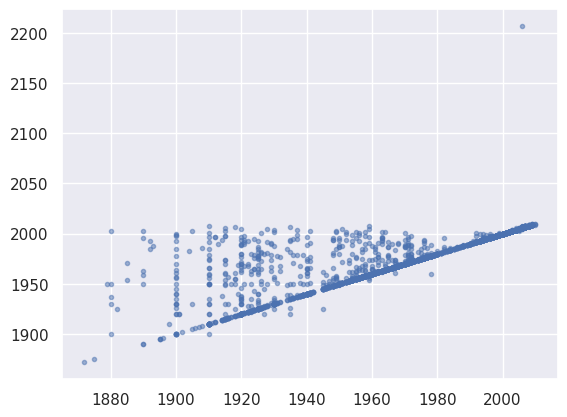

In [74]:
# YearBuiltでGarageYrBltを補完してよいか？これを確認するため関係を可視化する。
plt.plot(all_df.YearBuilt, all_df.GarageYrBlt,'.', alpha=0.5)

# →相関がみられる。補完する。
all_df['GarageYrBlt'].fillna(all_df.YearBuilt,inplace=True)

In [75]:
# check Nan
print(all_df.isna().sum()[all_df.isna().sum()>0])

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
MasVnrType     24
Electrical      1
KitchenQual     1
Functional      2
SaleType        1
dtype: int64


In [76]:
# I don't like mean so using mode()
fill_nan_2_mode=['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'KitchenQual', 'Functional', 'SaleType']
for i in fill_nan_2_mode:
    all_df[i].fillna(all_df[i].mode()[0],inplace=True)

In [77]:
# check Nan
print(all_df.isna().sum()[all_df.isna().sum()>0])

Series([], dtype: int64)


In [78]:
print(all_df.dtypes.value_counts())

object     43
int64      26
float64    11
dtype: int64


In [79]:
"""
処理が終わらない→ 数分かかった。
#多重共線性をなくすために、相関の強い特徴量を削除する
correlation = all_df.corr()
f , ax = plt.subplots(figsize = (13,10))
#sns.heatmap(correlation,square = True,  vmax=0.8, annot=True)
sns.heatmap(correlation, square = True, annot=True, fmt='.1f', annot_kws={'size':10})
"""

"\n処理が終わらない→ 数分かかった。\n#多重共線性をなくすために、相関の強い特徴量を削除する\ncorrelation = all_df.corr()\nf , ax = plt.subplots(figsize = (13,10))\n#sns.heatmap(correlation,square = True,  vmax=0.8, annot=True)\nsns.heatmap(correlation, square = True, annot=True, fmt='.1f', annot_kws={'size':10})\n"

In [82]:
#all_df=all_df.drop(['GrLivArea','garage_elapsed','GarageCars','remod_elapsed'],axis=1)
all_df.drop(['GrLivArea', 'GarageCars'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,0,None,None,None,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,0,None,MnPrv,Shed,700,7,2006,WD,Normal


In [84]:
"""
# Converting a variable with some numbers into a string
# It's good to convert to categorical variables from numbers you don't want them to affect the prediction no matter how big or small its number.
# https://qiita.com/muscle_nishimi/items/901ed94f3cdf1c8d893a
def convert_number2category(df, number2category_list):
    for column in number2category_list:
        df[column] = df[column].astype(str)

convert_number2category(all_df, ['MSSubClass','YrSold','MoSold'])
"""
"""
# type : object を全て ... あ、間違えた。
for column in all_df.columns:
    if all_df[column].dtype=='O':
        all_df[column] = all_df[column].astype(str)
"""

"\n# type : object を全て ... あ、間違えた。\nfor column in all_df.columns:\n    if all_df[column].dtype=='O':\n        all_df[column] = all_df[column].astype(str)\n"

In [87]:
# Feature Engineering
# making columns
def add_new_columns(df):
    # total square = 1F square + 2F square + B（地下 basement） total square
    df["TotalSF"] = df["1stFlrSF"] + df["2ndFlrSF"] + df["TotalBsmtSF"]

add_new_columns(all_df)

# remove
all_df.drop(['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF'],axis=1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0,0,0,1,0,0,0,0,1,0


In [88]:
# 文字列のカテゴリ変数化(One-Hot-Encoding) # memo: カテゴリ変数に大小の意味を持たせたい場合は Original Encoding (Label Encoding) を用いる
# pd.get_dummiesを使うとカテゴリ変数化できる。
all_df = pd.get_dummies(all_df)
all_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,...,0,0,0,1,0,0,0,0,1,0


In [89]:
print(all_df.dtypes.value_counts())

# object type all removed

uint8      266
int64       26
float64     12
dtype: int64


In [90]:
print(all_df.shape)

(2919, 304)


In [91]:
# 学習データと予測データに分割して元のデータフレームに戻す。(予測データの物件は削除できないので、学習データに対してのみ実施したい。分割すれば、学習データだけに対して次の工程とかでハズレ値の削除ができる)
#df_train = pd.merge(all_df.iloc[df_train.index[0]:df_train.index[-1]],df_train['SalePrice'],left_index=True,right_index=True)
#df_test = all_df.iloc[df_train.index[-1]:]
print(df_train['SalePrice'])
df_train = pd.merge(all_df[:df_train.shape[0]],df_train['SalePrice'],left_index=True,right_index=True) # all_df[:df_train.shape[0]] で 上半分(train部分)を取得して、それにSalePriceの列を追加する。
df_test = all_df[df_train.shape[0]:]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [92]:
# check duplicated data
print(df_train.duplicated().sum())

0


In [93]:
"""
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    print(df_train.isna().sum())
"""

'\nwith pd.option_context("display.max_rows", None, "display.max_columns", None):\n    print(df_train.isna().sum())\n'

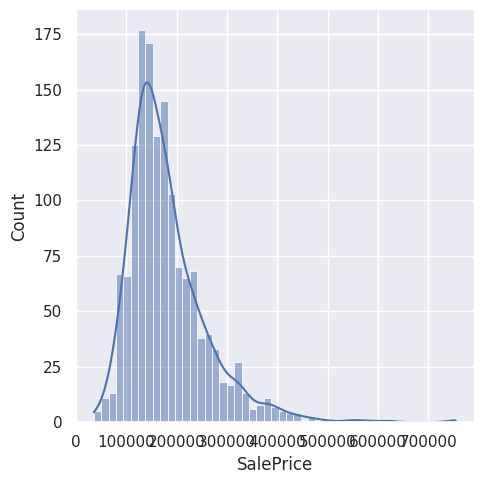

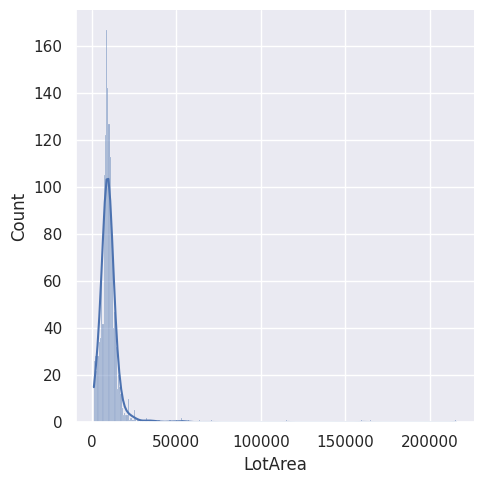

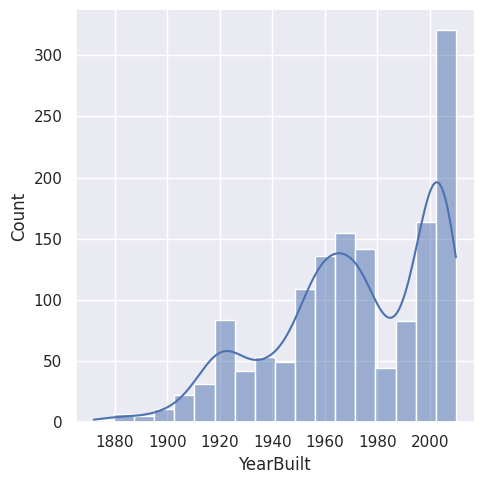

In [95]:
# check outlier
sns.displot(df_train['SalePrice'], kde=True)
sns.displot(df_train['LotArea'], kde=True)
sns.displot(df_train['YearBuilt'], kde=True)

In [96]:
# 以下に当てはまらない値を外れ値とする by displot
df_train = df_train[(df_train['LotArea']<20000) & (df_train['SalePrice']<400000)& (df_train['YearBuilt']>1920)]


In [97]:
print(df_train.shape)
print(df_test.shape)

(1274, 305)
(1459, 304)


<ipython-input-98-9ed0935737a6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


歪度: 0.9469
尖度: 0.7493


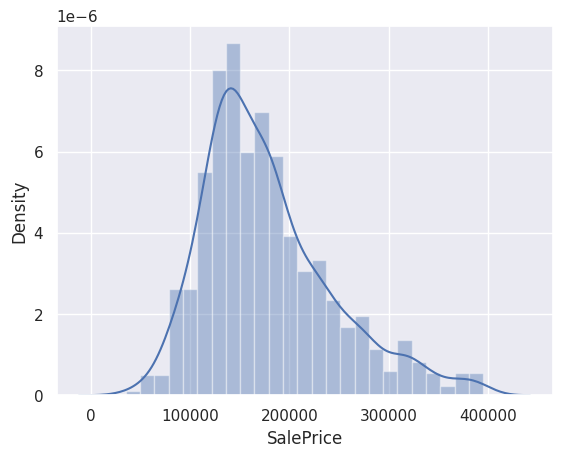

In [98]:
# SalePriceを対数変換する

# 対数変換前のヒストグラム、歪度、尖度
sns.distplot(df_train['SalePrice'])
print(f"歪度: {round(df_train['SalePrice'].skew(),4)}" )
print(f"尖度: {round(df_train['SalePrice'].kurt(),4)}" )

In [99]:
# SalePriceに対数変換した値を入れる
# np.log()は底がeの対数変換を行う
df_train['SalePrice'] = np.log(df_train['SalePrice'])

<ipython-input-100-3cf2f3d84e50>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


歪度: -0.098
尖度: 0.3196


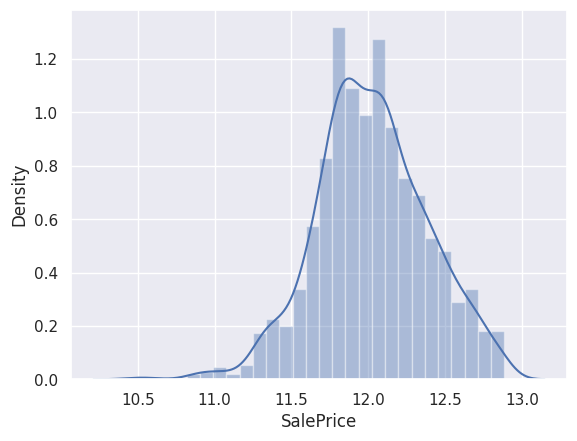

In [100]:
# 対数変換後のヒストグラム、歪度、尖度
sns.distplot(df_train['SalePrice'])
print(f"歪度: {round(df_train['SalePrice'].skew(),4)}" )
print(f"尖度: {round(df_train['SalePrice'].kurt(),4)}" )

In [101]:
# trainのdependentとindependent、predictのindependentに それぞれ dataframe を split する

from sklearn.model_selection import train_test_split

X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)


In [103]:
print(X_train.shape)#1019
print(X_test.shape)#255
print(y_train.shape)#1019
print(y_test.shape)#255
print(X.shape)#1274
print(y.shape)#1274

(1019, 304)
(255, 304)
(1019,)
(255,)
(1274, 304)
(1274,)


In [104]:
y.head(100)

0      12.247694
1      12.109011
2      12.317167
4      12.429216
5      11.870600
         ...    
107    11.652687
109    12.154779
110    11.827006
111    12.100712
112    12.858320
Name: SalePrice, Length: 100, dtype: float64

# ◆ [paCe] 3.Construct Stage

3.1.construct model like Logistic Regression Model, Tree-based Model,

3.2.Results and Evaluation

3.3.increasing the accuracy again

* Feature engineering again :)

In [105]:
from sklearn.linear_model import LinearRegression, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor

In [106]:
# from jerry
def adj_r2_score(x_train, y_test, y_preds):
    SS_reg = np.sum((y_test - y_preds)**2)
    SS_total = np.sum((y_test - np.mean(y_test))**2)
    r2 = 1-SS_reg/SS_total

    N = len(x_train)
    p = len(x_train.columns)

    adj_r2 = 1-((1-r2)*(N-1))/(N-p-1)
    return adj_r2

In [107]:
from sklearn.metrics import r2_score

# 自由度調整済み決定係数(adjusted R-Squared, R^2f)
# https://www.ritolab.com/posts/245

# 自由度調整済み決定係数とは？意味や解釈、活用法を解説！
# https://best-biostatistics.com/correlation_regression/adjusted-r-square.html
#
"""
決定係数には、たとえ無意味な変数であっても「変数の数が多ければ多いほど値が高くなる」という性質があるため、決定係数よりも、その欠点を補った「自由度調整済み決定係数」を見ていくことが多い。

R2f=1−SSeSSy×n−1n−p−1
R2f=1−決定係数×サンプルサイズ−1サンプルサイズ−説明変数の数−1
自由度調整済み決定係数は scikit-learn に用意されていないので、関数を作成して求めてみます。
"""
def adjusted_r2_score(y_actual, y_pred, number_dimensions):
    """自由度調整済み決定係数出力

    Args:
        y_actual (ndarray): 観察データ
        y_pred (ndarray): 予測データ
        number_dimensions (int): 次元数（説明変数の数）

    Returns:
        float: 自由度調整済み決定係数
    """
    # 決定係数
    coefficient_of_determination = r2_score(y_actual, y_pred)
    # サンプルサイズ
    sample_size = len(y_actual)

    return 1 - (1 - coefficient_of_determination) * (sample_size - 1) / (sample_size - number_dimensions - 1)

In [108]:
# Regression model
def pred_model(model, x_train, y_train, pred_data):
    reg = model()
    reg.fit(x_train, y_train)

    pred = reg.predict(pred_data)
    return pd.Series(pred)

In [109]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression

## 評価指標の整理

https://qiita.com/DS27/items/2204b10888a19869e083

**平均絶対誤差（MAE: Mean absolute error）**

→ 予測値と実測値の平均的なズレ（誤差）の大きさ　。０に近いほど良い。大きく予測を外したケースをあまり重要視していない。そのため、MAEを基準として良いモデルを選ぶと最大誤差が大きくなる傾向にある。

**平均二乗誤差(MSE: Mean squared error)**

→ 予測値と実測値のズレの大きさ。０に近いほど良い。予測を大きく外すと、大幅にMSEが大きくなる傾向にある。

**決定係数 (R^2)**

→ 回帰モデルの当てはまりの良さを評価する。1に近いほど良い。

**自由度調整済み決定係数(Adjusted R^2)**

→ 基本的に0~1の値をとる(一部例外あり)
→ 医療統計では0.5を超えれば優秀とみなされることが多い

In [110]:
# Linear regression
pred = pred_model(LinearRegression, X_train, y_train, X_test)
print('MAE: ', mean_absolute_error(y_test, pred))
print('MSE: ', mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

MAE:  750.1426848214309
MSE:  28503652.488340624
R2:  -203868610.9248197
Adjuted_R2:  1035652549.5780841
(1019, 304)
(1019,)
(255, 304)


In [111]:
# ElasticNet
pred = pred_model(ElasticNet, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

# the adjusted r2 is greater than r2. so the elasticnet model might be having a hard time interpreting my features

MAE:  0.10116047056099856
MSE:  0.020838390788219054
R2:  0.8509561605664774
Adjuted_R2:  1.7571427043222947


In [112]:
# BayesianRidge regression
pred = pred_model(BayesianRidge, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.0731150989419693
MSE:  0.011417350991982515
R2:  0.9183389041265482
Adjuted_R2:  1.4148383670371354


In [113]:
# RandomForest - Round 1
pred = pred_model(RandomForestRegressor, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.08453249901961721
MSE:  0.01387379236637265
R2:  0.9007695314478551
Adjuted_R2:  1.504090780244896


In [115]:
# ARDRegressor, HuberRegressor, Lasso
from sklearn.linear_model import ARDRegression, HuberRegressor, Lasso
# ARD
pred = pred_model(ARDRegression, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.10072926631316091
MSE:  0.01774703823581466
R2:  0.8730666516372876
Adjuted_R2:  1.644821409682579


In [116]:
# Huber
pred = pred_model(HuberRegressor, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.10235491299495057
MSE:  0.022913005027128175
R2:  0.8361177560729173
Adjuted_R2:  1.8325217991495801


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [117]:
# Lasso - Round 1
pred = pred_model(Lasso, X_train, y_train, X_test)
print('MAE: ',mean_absolute_error(y_test, pred))
print('MSE: ',mean_squared_error(y_test, pred))
print('R2: ', r2_score(y_test, pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, pred, X_test.shape[1]))

MAE:  0.10946224904469247
MSE:  0.023263019761698093
R2:  0.8336143218860462
Adjuted_R2:  1.845239244818885


## Tune their Hyperparameters

In [118]:
# GridSearchCVをインポート #
from sklearn.model_selection import GridSearchCV

# 試したいハイパーパラメータを各々に配列で用意
params = {
    'n_estimators'  : [4, 8, 16, 32],
    'max_depth' : [8, 16, 32, 64],
    'n_jobs': [-1]
}

# GridSearchCVにランダムフォレストと試行パラメータを
# 渡してインスタンス作成
cv = GridSearchCV(
    RandomForestRegressor(),
    params,
    verbose=2
)
# トレーニング
cv.fit(X_train, y_train)

# RandomForest - Round 2
# もっとも精度が良かったモデルを取り出して予測
best_radom_forest_model = cv.best_estimator_
best_radom_forest_pred = best_radom_forest_model.predict(X_test)

print("-" * 40)

# 精度検証
mean_absolute_error(y_test, best_radom_forest_pred)
print('MAE: ',mean_absolute_error(y_test, best_radom_forest_pred))
print('MSE: ',mean_squared_error(y_test, best_radom_forest_pred))
print('R2: ', r2_score(y_test, best_radom_forest_pred))
print('Adjuted_R2: ', adjusted_r2_score(y_test, best_radom_forest_pred, X_test.shape[1]))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=4, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.1s
[CV] END .............max_depth=8, n_estimators=8, n_jobs=-1; total time=   0.1s
[CV] END ............max_depth=8, n_estimators=16, n_jobs=-1; total time=   0.2s
[CV] END ............max_depth=8, n_estimators=1

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def lasso_tuning(train_x,train_y):
    # alphaパラメータのリスト
    param_list = [0.001, 0.01, 0.1, 1.0, 10.0,100.0,1000.0]

    for cnt,alpha in enumerate(param_list):
        # パラメータを設定したラッソ回帰モデル
        lasso = Lasso(alpha=alpha)
        # パイプライン生成
        pipeline = make_pipeline(StandardScaler(), lasso)

        # 学習データ内でホールドアウト検証のために分割 テストデータの割合は0.3 seed値を0に固定
        X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=0)

        # 学習
        pipeline.fit(X_train,y_train)

        # RMSE(平均誤差)を計算
        train_rmse = np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train)))
        test_rmse = np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test)))
        # ベストパラメータを更新
        if cnt == 0:
            best_score = test_rmse
            best_param = alpha
        elif best_score > test_rmse:
            best_score = test_rmse
            best_param = alpha

    # ベストパラメータのalphaと、そのときのMSEを出力
    print('alpha : ' + str(best_param))
    print('test score is : ' +str(round(best_score,4)))

    # ベストパラメータを返却
    return best_param

# best_alphaにベストパラメータのalphaが渡される。
best_alpha = lasso_tuning(X_train,y_train)

alpha : 0.01
test score is : 0.1098


In [120]:
# Lasso - Round 2
# ラッソ回帰モデルにベストパラメータを設定
lasso = Lasso(alpha = best_alpha)
# パイプラインの作成
pipeline = make_pipeline(StandardScaler(), lasso)
# 学習
pipeline.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lasso', Lasso(alpha=0.01))])

最も精度が出たalphaは「0.01」、RMSE(平均二乗平方根誤差)は「0.1098」となりました。

# ◆ [pacE] Execute Stage

モデルのパフォーマンスと結果を解釈する

実行可能なステップを関係者と共有する

In [122]:
# prediction
pred = pipeline.predict(df_test)
print(df_test.shape)

(1459, 304)


<ipython-input-123-3f77f0e04996>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred)


歪度: 0.4946
尖度: 1.2436


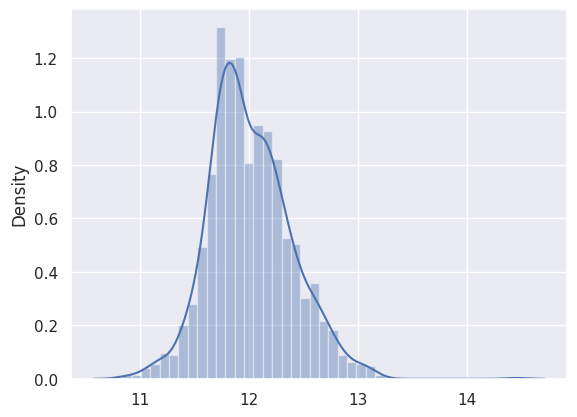

In [123]:
# 予測結果のプロット
sns.distplot(pred)
# 歪度と尖度
print(f"歪度: {round(pd.Series(pred).skew(),4)}" )
print(f"尖度: {round(pd.Series(pred).kurt(),4)}" )

<ipython-input-124-c2159aa359b4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_exp)


歪度: 6.4483
尖度: 111.3588


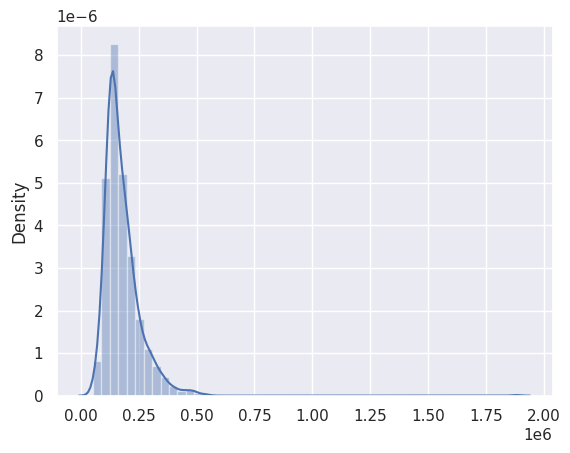

In [124]:
# 指数変換 戻す。
pred_exp = np.exp(pred)
# 指数変換した予測結果をプロット
sns.distplot(pred_exp)
# 歪度と尖度
print(f"歪度: {round(pd.Series(pred_exp).skew(),4)}" )
print(f"尖度: {round(pd.Series(pred_exp).kurt(),4)}" )



<ipython-input-125-4d273ddd5f04>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pred_exp_ex_outliars)


歪度: 1.0509
尖度: 0.9056


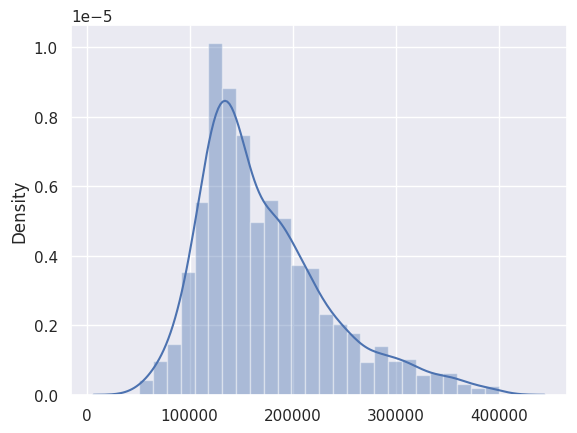

In [125]:
# 400,000より高い物件は除去
pred_exp_ex_outliars = pred_exp[pred_exp<400000]
# 指数変換した予測結果をプロット
sns.distplot(pred_exp_ex_outliars)
# 歪度と尖度
print(f"歪度: {round(pd.Series(pred_exp_ex_outliars).skew(),4)}" )
print(f"尖度: {round(pd.Series(pred_exp_ex_outliars).kurt(),4)}" )

<ipython-input-126-8e107527a978>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


歪度: -0.098
尖度: 0.3196


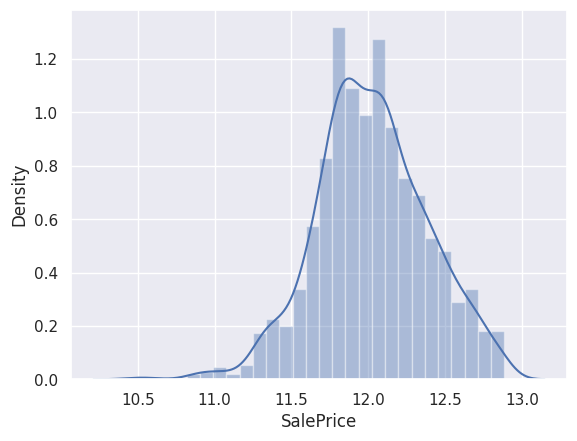

In [126]:
# 学習データの住宅価格をプロット(外れ値除去済み)
sns.distplot(df_train['SalePrice'])
# 歪度と尖度
print(f"歪度: {round(pd.Series(df_train['SalePrice']).skew(),4)}" )
print(f"尖度: {round(pd.Series(df_train['SalePrice']).kurt(),4)}" )

In [127]:
# sample_submission.csvの読み込み
df_submission = pd.read_csv('sample_submission.csv')
# sample_submission.csvの形式を確認するために先頭五行を見てみる。
df_submission.head()


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [128]:
print(pred_exp)

[123032.14026886 159456.94963407 179077.684606   ... 169959.28923578
 123939.60088999 228668.0846136 ]


In [129]:
print(df_submission.shape)
#print(pred_exp)
print(pred_exp.shape)
#print(pred_exp.describe())
#print(pred_exp.info())

(1459, 2)
(1459,)


In [130]:
# 指数変換した値を代入
df_submission['SalePrice'] = pred_exp
df_submission.head()

,Id,SalePrice
0,1461,123032.140269
1,1462,159456.949634
2,1463,179077.684606
3,1464,195350.660449
4,1465,188270.645338


In [131]:
# submission.csvを出力
df_submission.to_csv('submission/submission_4_0814.csv',index=False)